In [1]:
orth = ['../out/orthologs_correlation_g%d.tsv' % x
        for x in range(4)]

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
# other imports
import itertools
import numpy as np
import pandas as pd

In [4]:
rs = [pd.read_table(x)
      for x in orth]

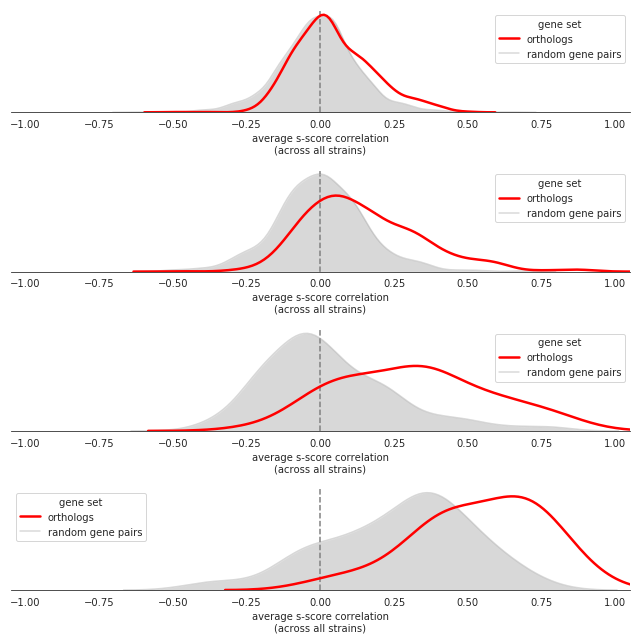

In [5]:
plt.figure(figsize=(9, 9))

for i, r in enumerate(rs):
    plt.subplot(4, 1, i+1)
    
    sns.kdeplot(r[r['genes'] == 'same'].groupby('gene').mean()['corr'],
                label='orthologs',
                lw=2.5,
                color='r',
                zorder=10)
    sns.kdeplot(r[r['genes'] == 'shuffled'].groupby('gene').mean()['corr'],
                label='random gene pairs',
                color='grey',
                shade=True,
                alpha=0.3)
    plt.legend(title='gene set',
               frameon=True)
    plt.xlabel('average s-score correlation\n(across all strains)')
    plt.yticks([])
    plt.xlim(-1.05, 1.05)
    plt.axvline(0,
                color='grey',
                linestyle='dashed',
                zorder=0)
    
sns.despine(left=True)
plt.tight_layout();

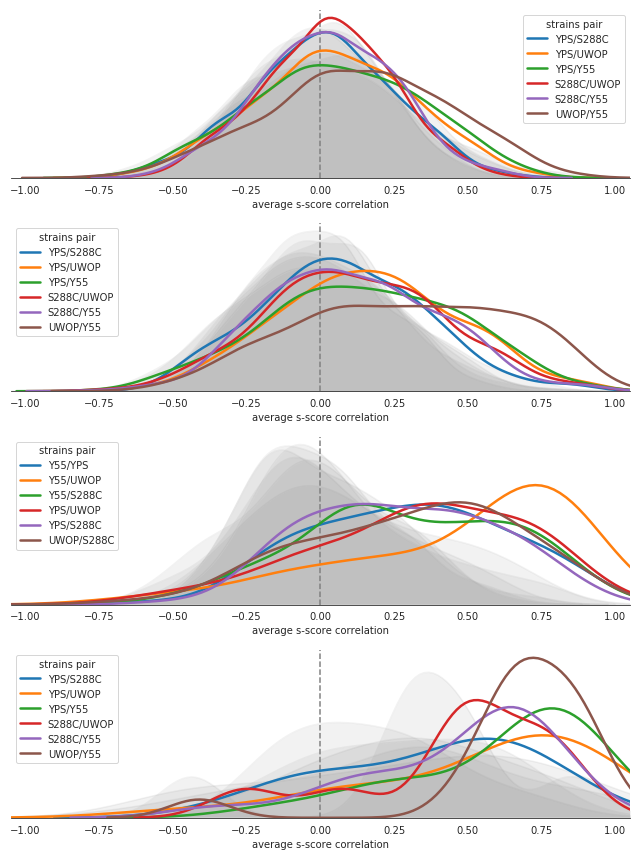

In [6]:
plt.figure(figsize=(9, 12))

for i, r in enumerate(rs):
    plt.subplot(4, 1, i+1)

    strains = set(r['strain1']).union(r['strain2'])
    for s1, s2 in itertools.combinations(strains, 2):
        sns.kdeplot(r[(r['genes'] == 'shuffled') &
                      (((r['strain1'] == s1) & ((r['strain2'] == s2))) |
                      ((r['strain2'] == s1) & ((r['strain1'] == s2))))
                     ].groupby('gene').mean()['corr'],
                    label='_',
                    shade=True,
                    alpha=0.1,
                    zorder=0,
                    color='grey')
        sns.kdeplot(r[(r['genes'] == 'same') &
                      (((r['strain1'] == s1) & ((r['strain2'] == s2))) |
                      ((r['strain2'] == s1) & ((r['strain1'] == s2))))
                     ].groupby('gene').mean()['corr'],
                    label=s1 + '/' + s2,
                    lw=2.5)

    plt.legend(title='strains pair',
               frameon=True)
    plt.xlabel('average s-score correlation')
    plt.yticks([])
    plt.xlim(-1.05, 1.05)
    plt.axvline(0,
                color='grey',
                linestyle='dashed',
                zorder=0)
sns.despine(left=True)
plt.tight_layout();

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>